In [1]:
# Data Manupulation
import numpy as np
import pandas as pd
# Plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics



# CSV File - Read
# CSV File - Read
df = pd.read_csv('E:\\credit\\credittrain.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']

print(df.head(5)) 

print(df.ndim)

print(df.shape)

print(df.columns)

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [2]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3]:
pd.crosstab( df['Married'].isnull(), df['Dependents'].isnull())

Dependents,False,True
Married,,
False,599,12
True,0,3


In [6]:
from collections import Counter
Counter(df['Dependents'])

Counter({nan: 15, '0': 345, '1': 102, '2': 101, '3+': 51})

In [7]:
# Fill Empty data to Male
gender_null = df[df['Married'].isnull()].index.tolist()
df['Married'].iloc[gender_null] = "0"
Counter(df['Married'])

C:\Users\rs\Anaconda5\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Counter({'0': 3, 'No': 213, 'Yes': 398})

In [8]:

df.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
from collections import Counter
Counter(df['Gender'])

Counter({nan: 13, 'Female': 112, 'Male': 489})

In [10]:

# Fill Empty data to Male
gender_null = df[df['Gender'].isnull()].index.tolist()
df['Gender'].iloc[gender_null] = "Male"
Counter(df['Gender'])

Counter({'Female': 112, 'Male': 502})

In [11]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
pd.crosstab( df['Married'], df['Dependents'])

Dependents,0,1,2,3+
Married,,,,
No,171,23,8,7
Yes,174,79,93,44


In [13]:

bachelor_null = df[ (df['Married'] == "NO") & (df['Dependents'].isnull())]
df['Dependents'].iloc[bachelor_null]="0"
Counter(df['Dependents'])

Counter({nan: 15, '0': 345, '1': 102, '2': 101, '3+': 51})

In [14]:
dep_null = df[df['Dependents'].isnull()].index.tolist()
df['Dependents'].iloc[dep_null] = '0'
Counter(df['Dependents'])

Counter({'0': 360, '1': 102, '2': 101, '3+': 51})

In [15]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
# Fill Empty data to Male
Self_Employed_null = df[df['Self_Employed'].isnull()].index.tolist()
df['Self_Employed'].iloc[Self_Employed_null] = "No"
Counter(df['Self_Employed'])

Counter({'No': 532, 'Yes': 82})

In [17]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
pd.crosstab( df['LoanAmount'].isnull(), df['Loan_Amount_Term'].isnull())

Loan_Amount_Term,False,True
LoanAmount,,
False,578,14
True,22,0


In [19]:
df.groupby(df['Loan_Amount_Term'])['LoanAmount'].mean()

Loan_Amount_Term
12.0     111.000000
36.0     117.500000
60.0     140.000000
84.0     132.250000
120.0     22.333333
180.0    147.523810
240.0    118.333333
300.0    185.153846
360.0    147.245436
480.0    151.800000
Name: LoanAmount, dtype: float64

In [20]:
pd.crosstab( df['LoanAmount'].isnull(), df['Loan_Amount_Term'])

Loan_Amount_Term,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,360.0,480.0
LoanAmount,,,,,,,,,,
False,1,2,2,4,3,42,3,13,493,15
True,0,0,0,0,0,2,1,0,19,0


In [21]:
df['LoanAmount'].median()

128.0

In [22]:
df['LoanAmount'][ ( df['LoanAmount'].isnull())] = 130

C:\Users\rs\Anaconda5\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
(df['Loan_Amount_Term']).value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [25]:
df['Loan_Amount_Term'][ ( df['Loan_Amount_Term'].isnull())] = 360

C:\Users\rs\Anaconda5\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
(df['Credit_History']).value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [28]:
Counter(df['Credit_History'])

Counter({0.0: 89,
         1.0: 475,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1})

In [29]:
df['Credit_History'][ ( df['Credit_History'].isnull())] = 1.0

C:\Users\rs\Anaconda5\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [31]:
df.shape

(614, 13)

In [32]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.824104,342.410423,0.855049
std,6109.041673,2926.248369,84.092905,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [34]:
df2=df
df2 = df2.query('ApplicantIncome < 20000')
print(df2.shape)

(602, 13)


In [35]:
X = df2.iloc[:,[6,8]]
print(X.head())

   ApplicantIncome  LoanAmount
0             5849       130.0
1             4583       128.0
2             3000        66.0
3             2583       120.0
4             6000       141.0


In [36]:

from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df2["Property_Area_code"] = lb_make.fit_transform(df2["Property_Area"])
df2[["Property_Area", "Property_Area_code"]].head(11)

Y = df2["Property_Area_code"]  # property # convert to Numerics
print(Y.head())

0    2
1    0
2    2
3    2
4    2
Name: Property_Area_code, dtype: int32


C:\Users\rs\Anaconda5\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [37]:
df2 = pd.get_dummies(df2.drop(['Loan_ID'],axis=1) ,drop_first=True)
df2.head()


ktype = 'linear'  # linear, poly,sigmoid , rbf

from sklearn import svm
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel=ktype, C=1,gamma=1).fit(X, Y)

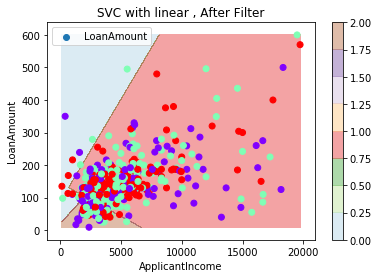

In [38]:
########################################
# create a mesh to plot in
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
h = (x_max / x_min)/100
#print(x_min, x_max, h)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#print(xx,yy)
#########################################

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,  alpha=0.4, cmap=plt.cm.Paired) 

plt.colorbar() 



plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.rainbow_r)
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
#plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear , After Filter')
plt.legend()
plt.show()